In [296]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


# Column names
colnames = ['Node', 'Position1', 'Position2']
position_data = pd.read_csv('sub_data_file.csv', header=None, names=colnames, index_col=['Node']) # Reading and assigning the nodes as index, to remove redundancy
position_data.head()

,Position1,Position2
Node,,
1,4873.6,4886.7
2,-3295.7,-4330.5
3,-2407.1,4397.4
4,-1027.0,-4828.9
5,-4260.1,1838.4


In [297]:
# Basic information
print(f'Basic dataset information : \n{position_data.info()}')
print(f'Checking null values : \n{position_data.isnull().sum()}')
print(f'Checking unique values of : \n{position_data.index.nunique()}')

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 1 to 152
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Position1  152 non-null    float64
 1   Position2  152 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB
Basic dataset information : 
None
Checking null values : 
Position1    0
Position2    0
dtype: int64
Checking unique values of : 
152


> There are no null values and nothing there are 150 points in so everything is working right

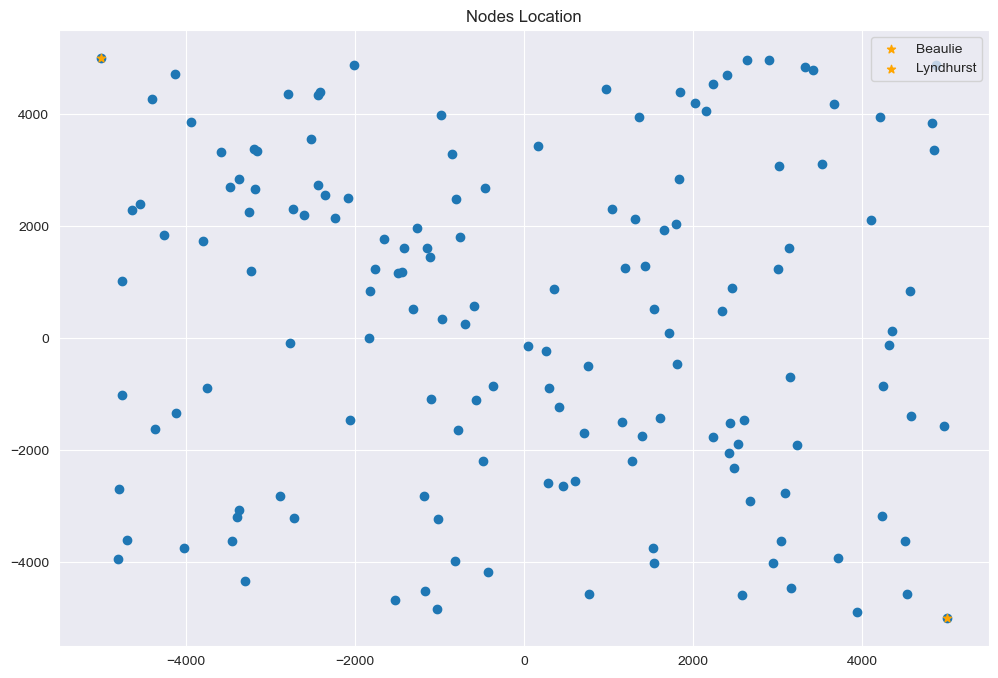

In [298]:
# Plotting the points on the map
coordinate_x = position_data['Position1']
coordinate_y = position_data['Position2']

# Input Beaulieu and Lyndhurst coordinates
beaulie_coordinate = (5000, -5000)
lyndhurst_coordinate = (-5000, 5000)

plt.figure(figsize = (12, 8))
plt.title('Nodes Location')
plt.scatter(coordinate_x, coordinate_y)
plt.scatter(beaulie_coordinate[0], beaulie_coordinate[1], label='Beaulie', color='orange', marker='*')
plt.scatter(lyndhurst_coordinate[0], lyndhurst_coordinate[1], label='Lyndhurst', color='orange', marker='*')
plt.legend(loc='upper right')
plt.show()

1. Calculating the distance

In [299]:
# Distance function
def calculate_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
distances = [] # List for appending in dataframe
for i in range(len(position_data)):
    for j in range(i + 1, len(position_data)):
        id1 = position_data.index[i]
        id2 = position_data.index[j]
        x1, y1 = position_data.iloc[i]['Position1'], position_data.iloc[i]['Position2']
        x2, y2 = position_data.iloc[j]['Position1'], position_data.iloc[j]['Position2']
        distance = calculate_distance(x1, x2, y1, y2)
        distances.append({"point1": id1, "point2": id2, "distance": distance})

distance_df = pd.DataFrame(distances)
print(f'There are total of {len(distance_df)} points.')
distance_df.head()

There are total of 11476 points.


,point1,point2,distance
0,1,2,12316.421490
1,1,3,7297.123199
2,1,4,11367.056071
3,1,5,9628.946390
4,1,6,3660.094705


> We get a total of 11175 value points each with the distance between one another.

`Given conditions`
---
| Distance (d) | Transmission rate (Mbps) |
|--------------|--------------------------|
| d >= 3000 m  | 0                        |
| 3000 m > d >= 2500 | 1                        |
| 2500 m > d >= 2000 m | 2                        |
| 2000 m > d >= 1500 m | 3                        |
| 1500 m > d >= 1000 m  | 4                        |
| 1000 m > d >= 500 m | 5                        |
| 500 m > d  | 7                        |

3. Now Add another row checking for transmission rate constraint

In [300]:
# define labels and bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = [7,5,4,3,2,1,0]
distance_df['transmission'] = pd.cut(distance_df['distance'], bins=bins, labels=labels, right=False)
distance_df.head()

,point1,point2,distance,transmission
0,1,2,12316.421490,0
1,1,3,7297.123199,0
2,1,4,11367.056071,0
3,1,5,9628.946390,0
4,1,6,3660.094705,0


In [301]:
distance_df['transmission'].value_counts() # The unique number of transmission rate for nodes

transmission
0    8938
1     677
2     607
3     507
4     397
5     251
7      99
Name: count, dtype: int64

In [302]:
distance_df[distance_df['transmission'] == 5]

,point1,point2,distance,transmission
159,2,11,727.156792,5
196,2,48,928.263869,5
320,3,23,622.978138,5
439,3,142,842.372198,5
483,4,38,892.092697,5
...,...,...,...,...
11280,132,147,909.399984,5
11305,134,135,636.205222,5
11323,135,136,978.618544,5
11400,140,143,866.276982,5


In [303]:
def plot_points(df, points):
    coordinate_x = df['Position1']
    coordinate_y = df['Position2']

    # Input Beaulieu and Lyndhurst coordinates
    beaulie_coordinate = (5000, -5000)
    lyndhurst_coordinate = (-5000, 5000)

    plt.figure(figsize = (12, 8))
    plt.title('Nodes Location')
    plt.scatter(coordinate_x, coordinate_y)
    plt.scatter(beaulie_coordinate[0], beaulie_coordinate[1], label='Beaulie', color='orange', marker='*')
    plt.scatter(lyndhurst_coordinate[0], lyndhurst_coordinate[1], label='Lyndhurst', color='orange', marker='*')
    for i in range(len(points) -1):
        plt.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], 'r-', label="Line between points" if i == 0 else "")
    plt.legend(loc='upper right')
    plt.show()

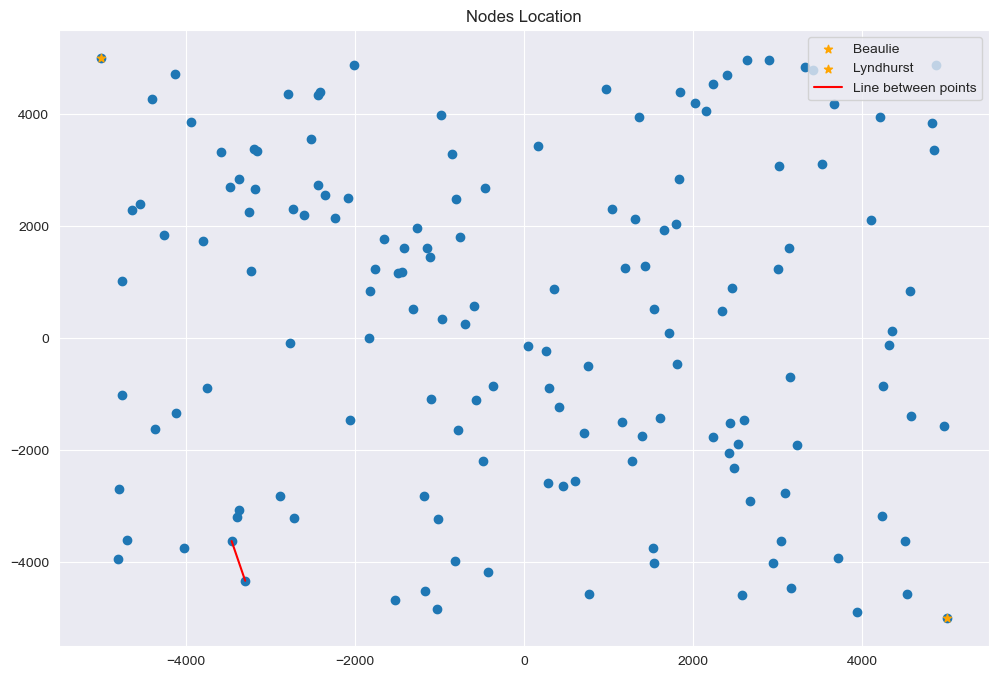

In [304]:
plot_points(position_data, [(-3295.7, -4330.5), (-3456.3, -3621.3)])

In [305]:
position_data[position_data.index == 11]

,Position1,Position2
Node,,
11,-3456.3,-3621.3


In [306]:
distance_df[distance_df['point1'] == 1]

,point1,point2,distance,transmission
0,1,2,12316.421490,0
1,1,3,7297.123199,0
2,1,4,11367.056071,0
3,1,5,9628.946390,0
4,1,6,3660.094705,0
...,...,...,...,...
146,1,148,6036.541137,0
147,1,149,10931.460939,0
148,1,150,2596.463383,1
149,1,151,9887.507970,0


In [307]:
merged_df = pd.merge(distance_df, position_data, left_on='point1', right_index=True, suffixes=('_point1', '_point2'))
merged_df = pd.merge(merged_df, position_data, left_on='point2', right_index=True)

In [308]:
merged_df.head()

,point1,point2,distance,transmission,Position1_x,Position2_x,Position1_y,Position2_y
0,1,2,12316.421490,0,4873.6,4886.7,-3295.7,-4330.5
1,1,3,7297.123199,0,4873.6,4886.7,-2407.1,4397.4
2,1,4,11367.056071,0,4873.6,4886.7,-1027.0,-4828.9
3,1,5,9628.946390,0,4873.6,4886.7,-4260.1,1838.4
4,1,6,3660.094705,0,4873.6,4886.7,1841.0,2837.4


In [309]:
position_data['point_coordinates']  = list(zip(position_data['Position1'], position_data['Position2']))
position_data.head()

,Position1,Position2,point_coordinates
Node,,,
1,4873.6,4886.7,"(4873.6, 4886.7)"
2,-3295.7,-4330.5,"(-3295.7, -4330.5)"
3,-2407.1,4397.4,"(-2407.1, 4397.4)"
4,-1027.0,-4828.9,"(-1027.0, -4828.9)"
5,-4260.1,1838.4,"(-4260.1, 1838.4)"


In [310]:
merged_df = pd.merge(distance_df, position_data, left_on='point1', right_index=True)
merged_df = pd.merge(merged_df, position_data, left_on='point2', right_index=True, )
merged_df.head()

,point1,point2,distance,transmission,Position1_x,Position2_x,point_coordinates_x,Position1_y,Position2_y,point_coordinates_y
0,1,2,12316.421490,0,4873.6,4886.7,"(4873.6, 4886.7)",-3295.7,-4330.5,"(-3295.7, -4330.5)"
1,1,3,7297.123199,0,4873.6,4886.7,"(4873.6, 4886.7)",-2407.1,4397.4,"(-2407.1, 4397.4)"
2,1,4,11367.056071,0,4873.6,4886.7,"(4873.6, 4886.7)",-1027.0,-4828.9,"(-1027.0, -4828.9)"
3,1,5,9628.946390,0,4873.6,4886.7,"(4873.6, 4886.7)",-4260.1,1838.4,"(-4260.1, 1838.4)"
4,1,6,3660.094705,0,4873.6,4886.7,"(4873.6, 4886.7)",1841.0,2837.4,"(1841.0, 2837.4)"


In [311]:
merged_df.drop(['Position1_x', 'Position1_y', 'Position2_x', 'Position2_y'], axis=1, inplace=True)
merged_df.head()

,point1,point2,distance,transmission,point_coordinates_x,point_coordinates_y
0,1,2,12316.421490,0,"(4873.6, 4886.7)","(-3295.7, -4330.5)"
1,1,3,7297.123199,0,"(4873.6, 4886.7)","(-2407.1, 4397.4)"
2,1,4,11367.056071,0,"(4873.6, 4886.7)","(-1027.0, -4828.9)"
3,1,5,9628.946390,0,"(4873.6, 4886.7)","(-4260.1, 1838.4)"
4,1,6,3660.094705,0,"(4873.6, 4886.7)","(1841.0, 2837.4)"


## Using Template from Mock Answer for Dijkstra algorithm to solve this problem

In [312]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11476 entries, 0 to 11475
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   point1               11476 non-null  int64   
 1   point2               11476 non-null  int64   
 2   distance             11476 non-null  float64 
 3   transmission         11476 non-null  category
 4   point_coordinates_x  11476 non-null  object  
 5   point_coordinates_y  11476 non-null  object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 460.0+ KB


In [313]:
class MultipleObjectiveGraph:
    def __init__(self):
        self.adj_matrix = []
        self.size = 0
        self.vertex_data = []

    def add_edge(self, u, v, transmission_rate):
        """Adds an edge with transmission rate (no latency)."""
        if transmission_rate > 0:  # Only add edges with non-zero transmission rate
            if u < self.size and v < self.size:
                self.adj_matrix[u][v] = transmission_rate
                self.adj_matrix[v][u] = transmission_rate  # For undirected graph

    def build_from_dataframe(self, df):
        """
        Building a graph from a dataframe.
        :param df: DataFrame
        :return: None
        """
        nodes = set(df['point1']).union(set(df['point2']))
        self.size = len(nodes)
        self.vertex_data = [str(node) for node in nodes]  # Ensure nodes are stored as strings
        node_index_map = {node: idx for idx, node in enumerate(self.vertex_data)}

        # Initialize adj_matrix with the correct size
        self.adj_matrix = [[0] * self.size for _ in range(self.size)]  # Adjacency matrix stores transmission rate

        # Add edges to the graph
        for _, row in df.iterrows():
            u = node_index_map[str(row['point1'])]
            v = node_index_map[str(row['point2'])]
            self.add_edge(u, v, row['transmission'])

    def path_to_node(self, start_vertex, end_vertex):
        """
        This function gets the maximum of minimum while tracking the number of hops along the way
        :param start_vertex: The starting node
        :param end_vertex:  The ending node
        :return: maximum rate, number of hops, path or None exist
        """
        # Make Sure the start and end are both string
        start_node = self.vertex_data.index(str(start_vertex))
        end_node = self.vertex_data.index(str(end_vertex))

        visited = [False] * self.size
        predecessor = [None] * self.size

        # Initialize also weights to negative infinity
        max_weights = [float('-inf')] * self.size
        max_weights[start_node] = float('inf')  # Set start node to infinity for maximization

        # Initialize hope count
        hop_count = [float('inf')] * self.size
        hop_count[start_node] = 0  # Start node has 0 hops

        # Apply modified Dijkstra's algorithm to maximize transmission rate
        # while minimizing number of hops
        for _ in range(self.size):
            max_weight = float('-inf')
            u = None
            for i in range(self.size):
                if not visited[i] and max_weights[i] > max_weight:
                    max_weight = max_weights[i]
                    u = i
            if u is None:
                break

            visited[u] = True

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    transmission_rate = self.adj_matrix[u][v]

                    new_transmission = min(max_weights[u], transmission_rate)
                    # Add hop count
                    new_hop_count = hop_count[u] + 1
                    # Checking the transmission rate with weight and hop count.
                    if (new_transmission > max_weights[v]) or (new_transmission == max_weights[v] and new_hop_count < hop_count[v]):
                        max_weights[v] = new_transmission
                        hop_count[v] = new_hop_count
                        predecessor[v] = u

        # Get the path from start to end node
        path = self.get_path(predecessor, start_node, end_node)
        return max_weights[end_node], hop_count[end_node], path

    def get_path(self, predecessors, start_vertex, end_vertex):
        path = []
        current = end_vertex
        while current is not None:
            path.insert(0, self.vertex_data[current])
            current = predecessors[current]
        if path[0] != self.vertex_data[start_vertex]:
            return "No Path"
        return " -> ".join(path)

In [314]:
g = MultipleObjectiveGraph()

# Build the graph from the dataframe
g.build_from_dataframe(merged_df)

# Find the path and maximum transmission rate and minimum number of hops from '1' to '2'
max_transmission, min_hops, path = g.path_to_node('151', '152')
latency = 30 * min_hops

In [315]:
print(f"Path: {path}, Maximum Transmission Rate: {max_transmission}, Latency: {latency} ms")

Path: 151 -> 57 -> 53 -> 15 -> 145 -> 61 -> 28 -> 112 -> 124 -> 116 -> 19 -> 95 -> 30 -> 7 -> 16 -> 22 -> 33 -> 39 -> 69 -> 108 -> 44 -> 99 -> 152, Maximum Transmission Rate: 5, Latency: 660 ms


### Plotting the whole path

In [316]:
# Function to plot the path returned first convert the path to individual nodes and
# update plot function for node to accept points
print(type(path))
points = list(map(int, path.split(' -> ')))

<class 'str'>


In [317]:
def plot_points(df, nodes):
    coordinate_x = df['Position1']
    coordinate_y = df['Position2']

    # Compute the positions of the nodes passed
    path_list = [tuple(position_data.loc[i, ['Position1', 'Position2']].tolist()) for i in nodes]
    plt.figure(figsize = (12, 8))
    plt.title('Nodes Location')
    plt.scatter(coordinate_x, coordinate_y)
    for j in range(len(path_list) -1):
        plt.plot([path_list[j][0], path_list[j + 1][0]], [path_list[j][1], path_list[j + 1][1]], 'r-', label="Line Path" if j == 0 else "")
    plt.legend(loc='upper right')
    plt.show()

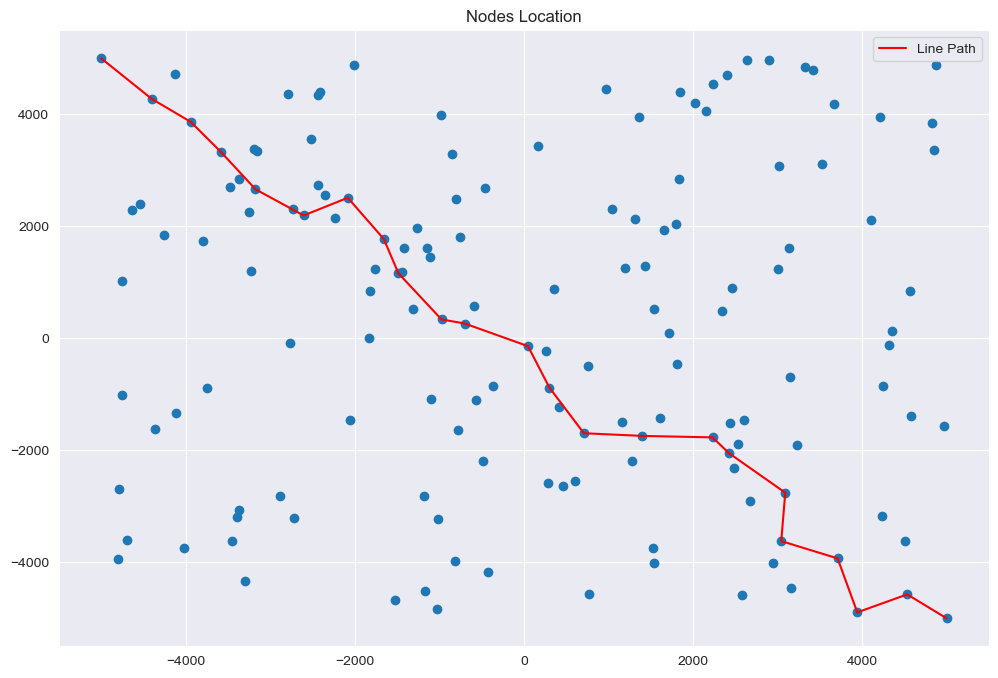

In [318]:
plot_points(position_data, points) # Using the position_data DataFrame as it already have the coordinate and help reduce searching problems, also points is the list from the path.

> The final answer is displayed above showing the route from Lyndhurst to Beaullie

In [319]:
print(f"Path: {path}, Maximum Transmission Rate: {max_transmission}, Latency: {latency} ms")

Path: 151 -> 57 -> 53 -> 15 -> 145 -> 61 -> 28 -> 112 -> 124 -> 116 -> 19 -> 95 -> 30 -> 7 -> 16 -> 22 -> 33 -> 39 -> 69 -> 108 -> 44 -> 99 -> 152, Maximum Transmission Rate: 5, Latency: 660 ms


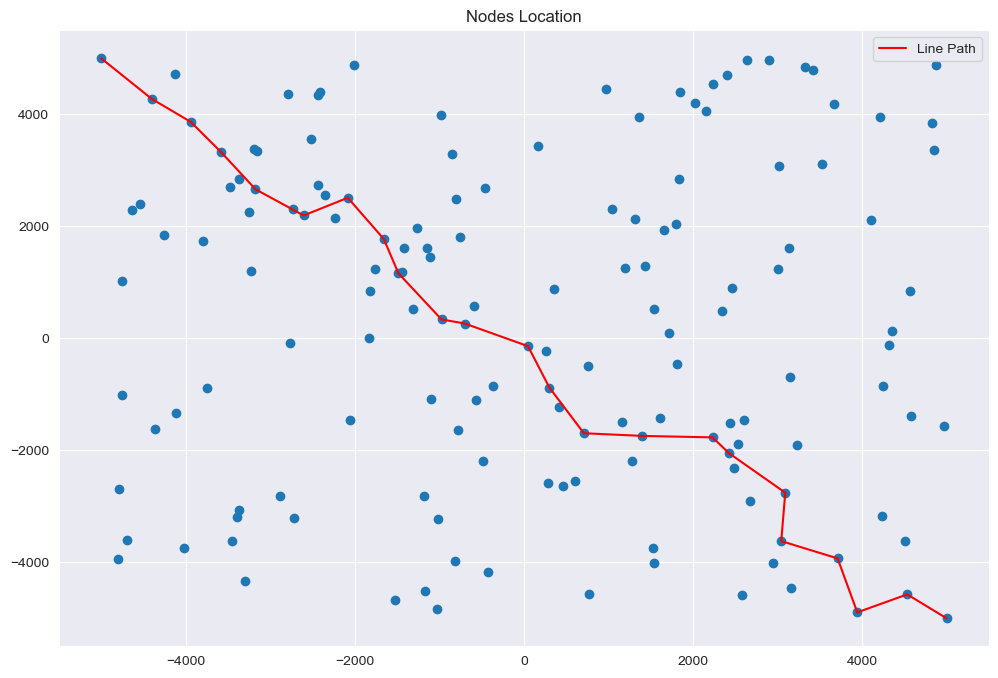

Path: 151 -> 57 -> 53 -> 15 -> 145 -> 61 -> 28 -> 112 -> 124 -> 116 -> 19 -> 95 -> 30 -> 7 -> 16 -> 22 -> 33 -> 39 -> 69 -> 108 -> 44 -> 99 -> 152, Maximum Transmission Rate: 5, Latency: 660 ms


In [332]:
# Again from any point to any point
g = MultipleObjectiveGraph()

# Build the graph from the dataframe
g.build_from_dataframe(merged_df)

# Find the path and maximum transmission rate and minimum number of hops from '1' to '2'
max_transmission, min_hops, path = g.path_to_node('151', '152')
latency = 30 * min_hops
points = list(map(int, path.split(' -> ')))
plot_points(position_data, points)
print(f"Path: {path}, Maximum Transmission Rate: {max_transmission}, Latency: {latency} ms")

## OUTPUT SOLUTION

In [333]:
import json
def build_json(df, points):
    result = {"Source Node": f"Node-{points[0]}"}
    result2 = ""
    min_transmission = float('inf')
    for i in range(len(points) -1):
        p1, p2 = points[i], points[i + 1]
        try:
            res = int(df[((df['point1'] == p1) & (df['point2'] == p2)) | (df['point1'] == p2) & (df['point2'] == p1)]['transmission'].values[0])
            min_transmission = min(min_transmission, res)
            result2 += f'({p1}->{p2}, {res})'
        except:
            print(f'Invalid point: {p1}, {p2}')
    result["Routing Node"] = result2
    result["End-to-end data rate"] = min_transmission
    return json.dumps(result)
res = build_json(merged_df, points)
print(res)

{"Source Node": "Node-151", "Routing Node": "(151->57, 5)(57->53, 5)(53->15, 5)(15->145, 5)(145->61, 5)(61->28, 5)(28->112, 7)(112->124, 5)(124->116, 5)(116->19, 5)(19->95, 5)(95->30, 5)(30->7, 7)(7->16, 5)(16->22, 5)(22->33, 5)(33->39, 5)(39->69, 5)(69->108, 5)(108->44, 5)(44->99, 5)(99->152, 5)", "End-to-end data rate": 5}
